# Data Science Project

## Labor Market Analysis
Job market changes refer to processes in which the quantity and types of jobs in an economy evolve over time. This includes shifts in the number of available jobs, the requirements for candidates, the nature of work, sectors experiencing growth or decline, as well as the skills needed to integrate into the workforce.

Changes in employment are a result of various factors influencing both the supply and demand for workers, as well as the structure of the economy and society. Key factors driving job market shifts include technological advancements, global economic changes, demographic trends, consumer behavior shifts, and more.

Data analysis on job growth and decline provides valuable insights for a range of stakeholders, including governments, businesses, and workers. Governments can use this data to plan for a certain level of unemployment and offer incentives for professional retraining. Additionally, it enables governments to focus investments and support in regions or industries that require attention. Academia can adjust its organizational structure based on future job demands, such as increasing or reducing faculty in specific fields. Businesses can identify sectors likely to face labor shortages and prepare accordingly. For citizens, this analysis is essential for choosing careers with high growth potential and avoiding sectors at risk of decline.

In conclusion, analyzing job market data is crucial for long-term planning by governments and citizens, helping to mitigate the negative impacts of unemployment.

### Project Significance
#### Problem the Project Aims to Solve
Unemployment and labor market mismatch. Job market data analysis can identify growing fields, skill demand trends, and future professions, offering recommendations to workers on required training or career transitions.


### Challenges in Predicting Job Market Changes
##### Rapid Changes
New technologies, economic crises, and pandemics (like COVID-19) can rapidly alter job demand. It is challenging to create accurate models that account for unforeseen events.
##### Dependence on Quality and Diverse Data
Effective predictions rely on up-to-date, accurate, and comprehensive data about the labor market. Often, data is incomplete, unsynchronized, or does not fully reflect reality.
##### Uncertainty Around Technological Trends
Predicting which technologies will become widespread and how they will affect the labor market is difficult. Some jobs may disappear due to automation, while new ones will emerge, but the pace of change is unpredictable.
##### Geographical and Demographic Variability
Trends are not uniform across regions or population groups. Analyzing averages may overlook important differences between areas or age groups.
##### Social and Political Factors
Regulations, legislation, and policy decisions can rapidly reshape the labor market. Predicting which regulatory or political changes will occur in the future is challenging.
##### Characterizing New Jobs
Newly created jobs are sometimes poorly defined at the outset. It is difficult to understand their requirements or predict how many such jobs will be created.
##### Biases in Predictive Models
Machine learning models can be influenced by biases in historical data. If a particular sector received less investment in the past, the model might erroneously predict that the sector will continue to decline.

### How to Address the Challenges
##### Diverse Data Collection
Utilize multiple data sources (job boards, surveys, government data, etc.).
##### Dynamic Models
Develop flexible models that can be updated with new changes.
##### Regional and Demographic Forecasting
Focus on regional and demographic-specific trends, rather than only general trends.
##### Understanding Model Limitations
Identify and mitigate biases in predictive models.

### About the project
This project explores various machine learning classifiers using job-related data to identify whether an individual is at risk of depression. We will employ the following ML classifiers:
?????

### The major goals of the project
##### At a Broad Level (Governments and Public Organizations): 
- Identifying trends and processes in the labor market, such as growing or declining job sectors and emerging fields.  
- Developing predictive tools to assist governments and organizations in planning economic policies, investments, and training programs.  
- Enhancing alignment between labor market demands and the available workforce supply.  

##### At an Individual Level (Workers and Students):
- Matching professions to the knowledge, skills, and experience of job seekers.  
- Recommending fields of study that can improve the likelihood of entering the labor market successfully.  
- Providing personalized insights to users based on their interests and personal data.

## About the Dataset
The dataset used in this analysis is derived from the Current Population Survey (CPS), which is a monthly survey conducted by the U.S. Bureau of Labor Statistics (BLS) in collaboration with the U.S. Census Bureau. The CPS is one of the primary sources of labor force statistics in the United States, providing detailed information about the employment status of the civilian noninstitutional population.

The Bureau of Labor Statistics (BLS) is an agency of the United States Department of Labor. It is the principal fact-finding agency in the broad field of labor economics and statistics and serves as part of the U.S. Federal Statistical System. BLS collects, calculates, analyzes, and publishes data essential to the public, employers, researchers, and government organizations.

The CPS collects data through interviews with a representative sample of households across the United States. The survey covers various demographic groups and collects information on a wide range of topics, including employment, unemployment, earnings, and occupation. Each month, approximately 60,000 households are surveyed, and the data collected helps to provide insights into the nation's labor market trends.

The information gathered from the CPS is widely used by policymakers, economists, and researchers to analyze labor market conditions, track employment trends, and inform decisions related to economic policies. The data is also used to estimate various labor force indicators, such as the unemployment rate, participation rate, and employment-to-population ratio.

sources:

https://www.bls.gov/ - U.S. Bureau of Labor Statistics

https://catalog.data.gov/dataset - The Home of the U.S. Government's Open Data

CSV files:

Jobs_NYC_Postings - job positions in nyc, with skills required, education, salary and more.


## Imports and upload of the data set

In [132]:
import os
os.environ["OMP_NUM_THREADS"] = "5"

import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re


## Data description
The dataset consists of 27 tables from the U.S. Bureau of Labor Statistics, providing employment data by detailed occupation, sex, race, and Hispanic or Latino ethnicity. These tables cover the years 1995 to 2023, excluding the years 2000-2001, which are missing from the dataset for some reason.
Each year has a separate table containing this data.

These tables serve as the foundation for our analysis, and we will be consolidating them to create a unified dataset that tracks the number of employed individuals by occupation across the years. The goal is to analyze employment trends and identify any significant patterns in the data.

Let's look at two example tables:

In [133]:
print("Data from 2023:\n")
df_2023 = pd.read_excel(r"C:\Users\etamari1\Downloads\datasets\Employed\cpsaat11b_2023.xlsx")
df_2023.dropna().head()

Data from 2023:



,Occupation,Total employed,Women,White,Black or\nAfrican\nAmerican,Asian,Hispanic\nor Latino
1,"Total, 16 years and over",161037.0,46.9,76.5,12.8,6.9,18.8
3,"Management, professional, and related occupations",70275.0,51.8,76.9,10.6,9.3,11.2
4,"Management, business, and financial operations...",30544.0,45.7,79.7,9.8,7.5,11.8
5,Management occupations,20906.0,41.9,80.9,9.2,7,12.1
6,Chief executives,1780.0,30.6,85.8,5.2,7.3,6.3


In [134]:
df_2023.shape

(601, 7)

In the table above, the employment data is organized by the age of the employee and the occupation in which they are employed.

Please note that the numerical data is in thousands

In [135]:
print("Data from 2005:\n")
df_2005 = pd.read_excel(r"C:\Users\etamari1\Downloads\datasets\Employed\cpsaat11b_2005.xlsx")
df_2005.dropna().head()

Data from 2005:



,Occupation,Total employed,Women,Black or African American,Asian,Hispanic or Latino
3,"Total, 16 years and over","141,730",46.4,10.8,4.4,13.1
5,"Management, professional, and related occupations","49,245",50.6,8.1,5.9,6.4
6,"Management, business, and financial operations...","20,450",42.5,7.1,4.8,6.5
7,Management occupations,"14,685",37.2,6.0,4.2,6.3
8,Chief executives,"1,644",23.8,3.0,3.9,3.8


In [136]:
df_2005.shape

(340, 6)

The table above is organized by gender and race, along with the occupations in which individuals are employed.

### Data Processing and Integration Explanation:

In this task, we will process and integrate data from multiple tables, each corresponding to a different year, into a single consolidated table. The goal is to create a unified dataset that contains the total number of employees for each occupation across different years.

At this stage, the focus is on the total number of employees per occupation, and factors such as age or race will not be considered. If an occupation is missing data for a particular year, we will leave the corresponding entry empty (i.e., a NaN value) for that year.

The purpose of this integration is to facilitate efficient analysis of the data by creating a unified table. This will allow us to compare and analyze employment trends across different years, focusing on total employment numbers for each occupation.

In [137]:
# Define the folder path containing the Excel files
folder_path = r"C:\Users\etamari1\Downloads\datasets\Employed"

# List to store processed data from each file
all_data = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.startswith("cpsaat11b_") and filename.endswith(".xlsx"):  
        file_path = os.path.join(folder_path, filename)
        
        # Extract the year from the filename
        year = filename.split("_")[-1].split(".")[0]  

        # Read the Excel file into a DataFrame
        df = pd.read_excel(file_path)  

        # Check if required columns exist in the DataFrame
        if 'Occupation' in df.columns and 'Total employed' in df.columns:
            df_filtered = df[['Occupation', 'Total employed']].copy()
            
            # Remove empty rows
            df_filtered.dropna(inplace=True)  
            
            # Convert 'Total employed' to float (removing commas)
            df_filtered['Total employed'] = df_filtered['Total employed'].astype(str).str.replace(',', '')
            df_filtered['Total employed'] = pd.to_numeric(df_filtered['Total employed'], errors='coerce')
            
            # Add a new column for the year
            df_filtered['Year'] = int(year)  # Convert year to integer
            
            # Append the processed DataFrame to the list
            all_data.append(df_filtered)

# Concatenate all processed data into a single DataFrame
final_df = pd.concat(all_data, ignore_index=True)

# Create a pivot table to organize data by occupation and year
pivot_table = final_df.pivot_table(
    index='Occupation',  
    columns='Year',  
    values='Total employed',  
    aggfunc='first'  
)
#pivot_table.reset_index(inplace=True)
# Ensure all values are float
pivot_table = pivot_table.astype(float)

# Save the cleaned dataset
#pivot_table.to_csv("aggregated_employment_data.csv")

pivot_table.head()

Year,1995,1996,1997,1998,1999,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Occupation,,,,,,,,,,,,,,,,,,,,,
Accountants and auditors,1526.0,1538.0,1625.0,1616.0,1658.0,1702.0,1639.0,1723.0,1683.0,1779.0,...,1724.0,1732.0,1777.0,1804.0,1929.0,1964.0,1696.0,1630.0,1652.0,1624.0
Actors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.0,49.0,47.0,40.0,36.0,40.0,29.0,45.0,56.0,50.0
Actors and directors,114.0,136.0,136.0,130.0,129.0,155.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Actuaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.0,21.0,14.0,29.0,33.0,33.0,32.0,29.0,30.0,43.0
Acupuncturists,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23.0,24.0,28.0,27.0


It is important to note that there are missing data points for certain occupations in specific years. This could be due to various reasons, such as difficulties in collecting data during those years or the introduction of new occupations that were not included in the earlier datasets. Once we analyze the data, we will be able to make informed assumptions and hypotheses about the reasons behind these gaps.

In [138]:
final_df.describe()

,Total employed,Year
count,13011.000000,13011.000000
mean,1316.378833,2011.292445
std,7637.439416,7.974258
min,0.000000,1995.000000
25%,46.000000,2006.000000
50%,134.000000,2012.000000
75%,454.000000,2018.000000
max,161037.000000,2023.000000


Total Employed:

The average number of employed individuals is 1,316, with a high standard deviation (7,637), indicating significant variation across observations.
The distribution is highly skewed, with a median of 134 and a maximum of 161,037, suggesting the presence of extreme outliers.
A minimum value of 0 indicates instances with no recorded employment, which may require further investigation.

Year:

The dataset covers a period from 1995 to 2023, with a mean year of 2011.
The interquartile range (IQR) suggests that 75% of the data is from 2018 or earlier, while the most recent observations reach 2023.



# Clustering

We are facing a challenge with job data as we lack additional information that could serve as an indicator for performing clustering. Therefore, we will utilize an NLP-based approach combining **Embeddings + Clustering**. Specifically, we will convert job titles into numerical vectors using word embeddings techniques such as **Word2Vec, BERT, or OpenAI Embeddings**. Subsequently, we will apply clustering methods like **K-Means, Hierarchical, or DBSCAN** on these vectors.  

Advantages of this approach are identifies hidden relationships between professions, even if the job titles are not identical and particularly effective for labor market analysis, as it enables understanding of similarities (e.g., recognizing that "Data Scientist" is closely related to "Machine Learning Engineer").

In [139]:
# Load the dataset (assuming 'pivot_table' DataFrame contains the column 'Occupation')
occupations = pivot_table.index.dropna().unique().tolist()  # Extract unique occupation names

# Load the Sentence Transformer model for embeddings
model = SentenceTransformer("all-MiniLM-L6-v2")

# Convert occupation names into numerical vector representations (embeddings)
occupation_embeddings = model.encode(occupations, convert_to_tensor=True).cpu().numpy()


We do not know the optimal K value for the `K-Means` model. Therefore, we will estimate it using the Silhouette Score, a metric that evaluates how well the clusters formed by the clustering algorithm perform. The metric measures how close each point is to its assigned cluster and how far it is from the nearest neighboring cluster.


C:\Users\etamari1\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\etamari1\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\etamari1\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\etamari1\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.p

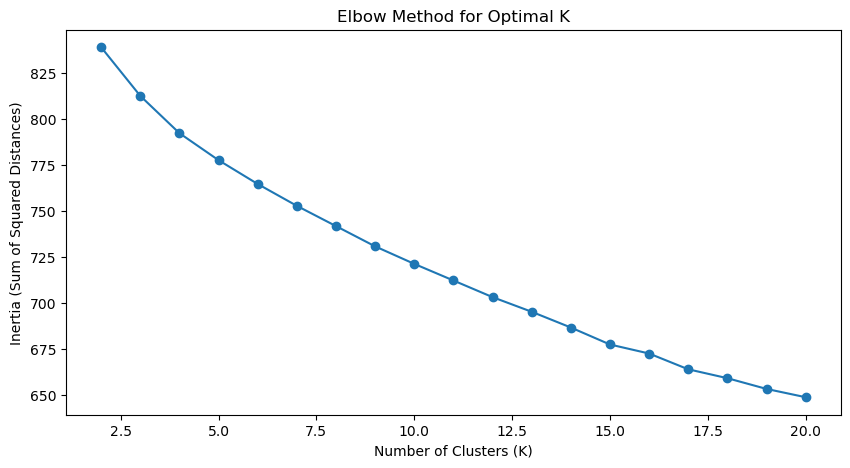

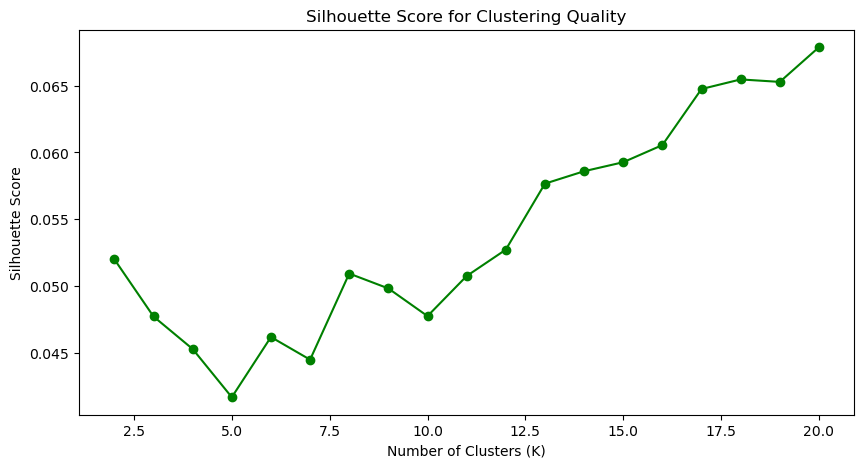

Optimal number of clusters: 20


In [140]:
#  Step 1: Find the optimal number of clusters (Elbow Method)
inertia = []
silhouette_scores = []
K_range = range(2, 21)  # Testing K values from 2 to 20

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
    labels = kmeans.fit_predict(occupation_embeddings)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(occupation_embeddings, labels))

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal K")
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, marker="o", color="green")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Clustering Quality")
plt.show()

# Choose the best K based on the elbow point or silhouette score
optimal_K = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_K}")

We have determined that the optimal number of clusters for `K-Means` is **20**. Now, we will proceed with running the `K-Means` algorithm using **K=20** to segment the data accordingly.

In [141]:
#  Step 2: Perform Clustering with Optimal K
kmeans = KMeans(n_clusters=optimal_K, random_state=42, n_init=10)
labels = kmeans.fit_predict(occupation_embeddings)

# Create a DataFrame to store occupations and their assigned cluster labels
clusters_df = pd.DataFrame({"Occupation": occupations, "Cluster": labels})

C:\Users\etamari1\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


To assign meaningful names to the clusters based on professional domains, we will utilize Natural Language Processing (NLP) and clustering techniques to generate automated labels. Job titles will be preprocessed to remove stopwords and generic terms such as "Workers" to ensure clarity and relevance. The `Counter` function from the `collections` module will be used to analyze the frequency of job titles within each cluster, identifying the most commonly occurring terms. Cluster names will be determined based on these dominant terms, ensuring that the labels accurately represent the core characteristics of each professional category.

In [142]:
#  Step 3: Assign names to clusters based on most common words in occupations

# Download NLTK stopwords if not already available
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Additional custom stopwords to remove domain-specific redundant words
custom_stopwords = {word.lower() for word in {"Workers", "Staff", "Employees", "Employee", "And", "Of", "The", 
                                              "In", "On", "For", "With", "Occupations", "Operators", "Attendants", 
                                              "Except", "Related", "Supervisors"}}

def clean_word(word):
    """
    Cleans a word by stripping spaces, converting to lowercase, and removing punctuation.
    """
    return re.sub(r'[^\w\s]', '', word).strip().lower()

def get_cluster_name(cluster_data):
    """
    Generates a clean name for the cluster based on frequent words in occupations.
    Converts words to lowercase for uniform processing and ensures proper capitalization in output.
    """
    words = " ".join(cluster_data["Occupation"]).split()

    # Clean each word (remove punctuation, lowercase, strip spaces)
    cleaned_words = [clean_word(word) for word in words]

    # Remove stopwords and custom-defined unnecessary words
    filtered_words = [word for word in cleaned_words if word not in stop_words and word not in custom_stopwords]

    # Select the 3 most common words
    common_words = [word for word, count in Counter(filtered_words).most_common(3)]

    # Remove duplicates while maintaining order
    unique_words = []
    for word in common_words:
        if word not in unique_words:
            unique_words.append(word)

    # Capitalize the first letter of each word
    formatted_name = " / ".join(word.capitalize() for word in unique_words)

    # If no meaningful words are found, fallback to "Miscellaneous"
    return formatted_name if formatted_name else "Miscellaneous"

# Generate unique cluster names
cluster_names = {}
used_names = set()

for cluster_num in range(optimal_K):
    name = get_cluster_name(clusters_df[clusters_df["Cluster"] == cluster_num])

    # If the name already exists, append a number to differentiate
    original_name = name
    count = 1
    while name in used_names:
        name = f"{original_name} ({count})"
        count += 1

    cluster_names[cluster_num] = name
    used_names.add(name)

# Assign the improved cluster names to the DataFrame
clusters_df["Cluster Name"] = clusters_df["Cluster"].map(cluster_names)

# Print the final cluster names
print("\nFinal Cluster Names:")
for cluster_num, name in cluster_names.items():
    print(f" Cluster {cluster_num}: {name}")


Final Cluster Names:
 Cluster 0: Inspectors / Testers / Samplers
 Cluster 1: Engineers / Scientists / Computer
 Cluster 2: Maintenance / Construction / Production
 Cluster 3: Firstline / Supervisorsmanagers / Service
 Cluster 4: Service / Social / Community
 Cluster 5: Transportation / Drivers / Truck
 Cluster 6: Teachers / Therapists / Counselors
 Cluster 7: Food / Agricultural / Preparation
 Cluster 8: Sales / Representatives / Services
 Cluster 9: Repairers / Installers / Equipment
 Cluster 10: Tenders / Machine / Setters
 Cluster 11: Officers / Investigators / Financial
 Cluster 12: Machine / Equipment / Computer
 Cluster 13: Managers / Administrative / Relations
 Cluster 14: Designers / Directors / Architects
 Cluster 15: Clerks / Information / Mail
 Cluster 16: Assistants / Medical / Physicians
 Cluster 17: Technicians / Technologists / Medical
 Cluster 18: Recreation / Religious / Sports
 Cluster 19: Analysts / Specialists / Computer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\etamari1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Let's examine which professions have been assigned to each cluster.

In [143]:
#  Step 4: Display Results
for cluster_num in range(optimal_K):
    print(f"\n Cluster {cluster_num} ({cluster_names[cluster_num]}):")
    print(clusters_df[clusters_df["Cluster"] == cluster_num]["Occupation"].tolist())


 Cluster 0 (Inspectors / Testers / Samplers):
['Agricultural inspectors', 'Appraisers and assessors of real estate', 'Construction and building inspectors', 'Construction inspectors', 'Fire inspectors', 'Garbage collectors', 'Inspectors, testers, and graders', 'Inspectors, testers, sorters, samplers, and weighers', 'Meter readers', 'Meter readers, utilities', 'Paperhangers', 'Precision inspectors, testers, and related workers', 'Production inspectors, checkers, and examiners', 'Production inspectors, testers, samplers, and weighers', 'Production testers', 'Proofreaders and copy markers', 'Property appraisers and assessors', 'Refuse and recyclable material collectors', 'Surveyors, cartographers, and photogrammetrists', 'Weighers, measurers, and checkers and samplers', 'Weighers, measurers, checkers, and samplers, recordkeeping', 'Weighers, measurers, checkers, and samplers, recordkeeping.']

 Cluster 1 (Engineers / Scientists / Computer):
['Aerospace engineers', 'Agricultural engineers

The following graph illustrates the distribution of professions across the clusters.

C:\Users\etamari1\AppData\Local\Temp\ipykernel_26012\2953754240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=clusters_df["Cluster"], palette="viridis")


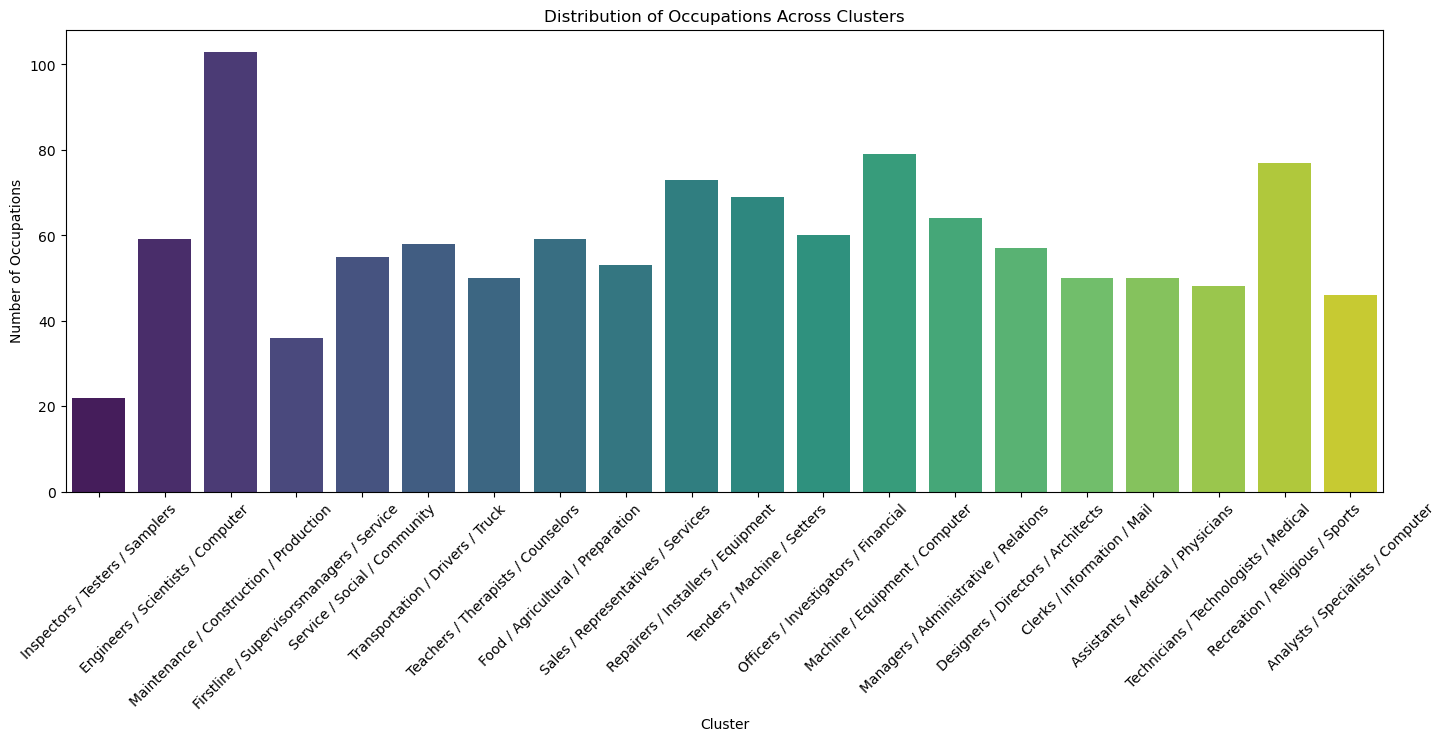

In [144]:
#  Step 5: Plot Distribution of Clusters
plt.figure(figsize=(17, 6))
sns.countplot(x=clusters_df["Cluster"], palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Number of Occupations")
plt.title("Distribution of Occupations Across Clusters")
plt.xticks(ticks=range(optimal_K), labels=[cluster_names[i] for i in range(optimal_K)], rotation=45)
plt.show()

In [145]:
# Create a new DataFrame from pivot_table
pivot_table_with_clusters = pivot_table.copy()

# Map the clusters from clusters_df based on Occupation
pivot_table_with_clusters["Cluster"] = pivot_table_with_clusters.index.map(
    clusters_df.set_index("Occupation")["Cluster"]
)

# Display the first few rows to verify
pivot_table_with_clusters.head()

# Save to CSV if needed
#pivot_table_with_clusters.to_csv("pivot_table_with_clusters.csv", index=True)


Year,1995,1996,1997,1998,1999,2002,2003,2004,2005,2006,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Cluster
Occupation,,,,,,,,,,,,,,,,,,,,,
Accountants and auditors,1526.0,1538.0,1625.0,1616.0,1658.0,1702.0,1639.0,1723.0,1683.0,1779.0,...,1732.0,1777.0,1804.0,1929.0,1964.0,1696.0,1630.0,1652.0,1624.0,11
Actors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.0,47.0,40.0,36.0,40.0,29.0,45.0,56.0,50.0,14
Actors and directors,114.0,136.0,136.0,130.0,129.0,155.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
Actuaries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.0,14.0,29.0,33.0,33.0,32.0,29.0,30.0,43.0,11
Acupuncturists,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,23.0,24.0,28.0,27.0,16


A two-dimensional visualization will be generated to depict the distribution of job positions across the clusters.

C:\Users\etamari1\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


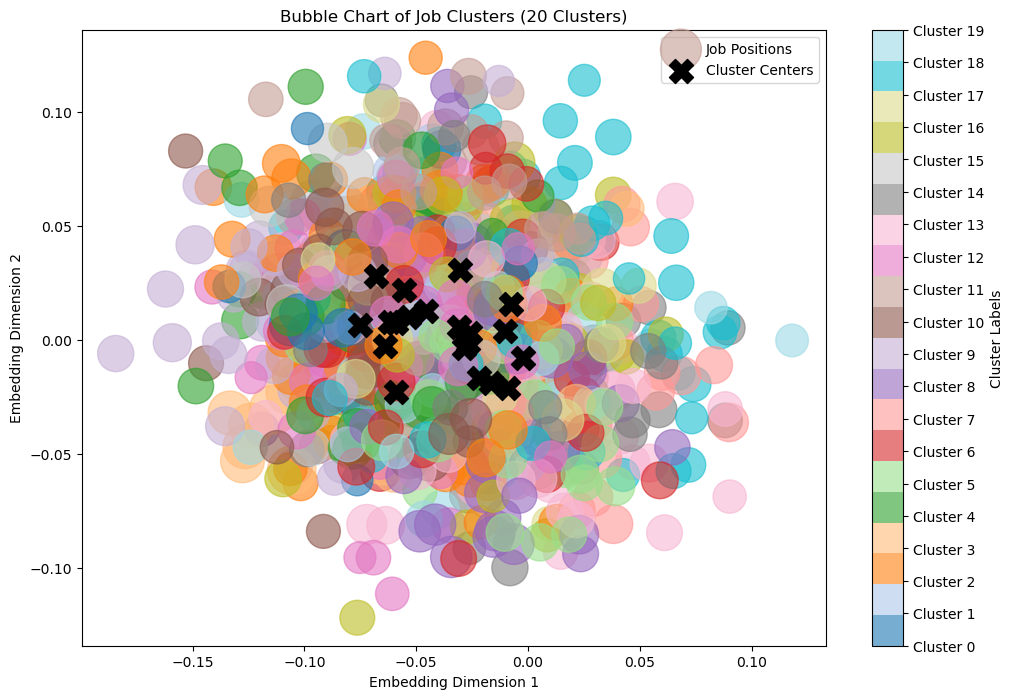

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Ensure the variable `optimal_K` is defined
if 'optimal_K' not in globals():
    print("Recomputing optimal_K using the Elbow Method and Silhouette Score...")
    
    # Define range for K
    K_range = range(2, 21)
    inertia = []
    silhouette_scores = []

    # Compute K-Means for different cluster sizes
    for K in K_range:
        kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
        labels = kmeans.fit_predict(occupation_embeddings)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(occupation_embeddings, labels))

    # Find the best K
    optimal_K = 20  # Set to 20 explicitly
    print(f"Number of clusters set to: {optimal_K}")

# Perform K-Means clustering with 20 clusters
kmeans = KMeans(n_clusters=optimal_K, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(occupation_embeddings)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Calculate distances of occupations to their assigned cluster centers
distances = np.min(cdist(occupation_embeddings, cluster_centers, metric='euclidean'), axis=1)

# Normalize distances for bubble sizes
bubble_sizes = (1 / (distances + 1e-5)) * 500  # Prevent division by zero and scale

# Create the scatter plot (bubble chart)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    occupation_embeddings[:, 0], occupation_embeddings[:, 1], 
    c=cluster_labels, cmap='tab20', alpha=0.6, s=bubble_sizes, label="Job Positions"
)

# Plot cluster centers as larger markers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], 
            c='black', marker='X', s=300, label='Cluster Centers')

# Add colorbar as a legend
cbar = plt.colorbar(scatter, ticks=range(optimal_K))
cbar.set_label("Cluster Labels")
cbar.set_ticks(range(optimal_K))
cbar.set_ticklabels([f"Cluster {i}" for i in range(optimal_K)])

# Add labels and title
plt.xlabel("Embedding Dimension 1")
plt.ylabel("Embedding Dimension 2")
plt.title("Bubble Chart of Job Clusters (20 Clusters)")
plt.legend()
plt.show()


It is evident that the points in the graph appear scattered, and the clusters were assigned in a seemingly random manner. To gain a deeper understanding of the model’s clustering logic, we will generate a 3D visualization and examine whether the clustering assignments exhibit a meaningful structure.

C:\Users\etamari1\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


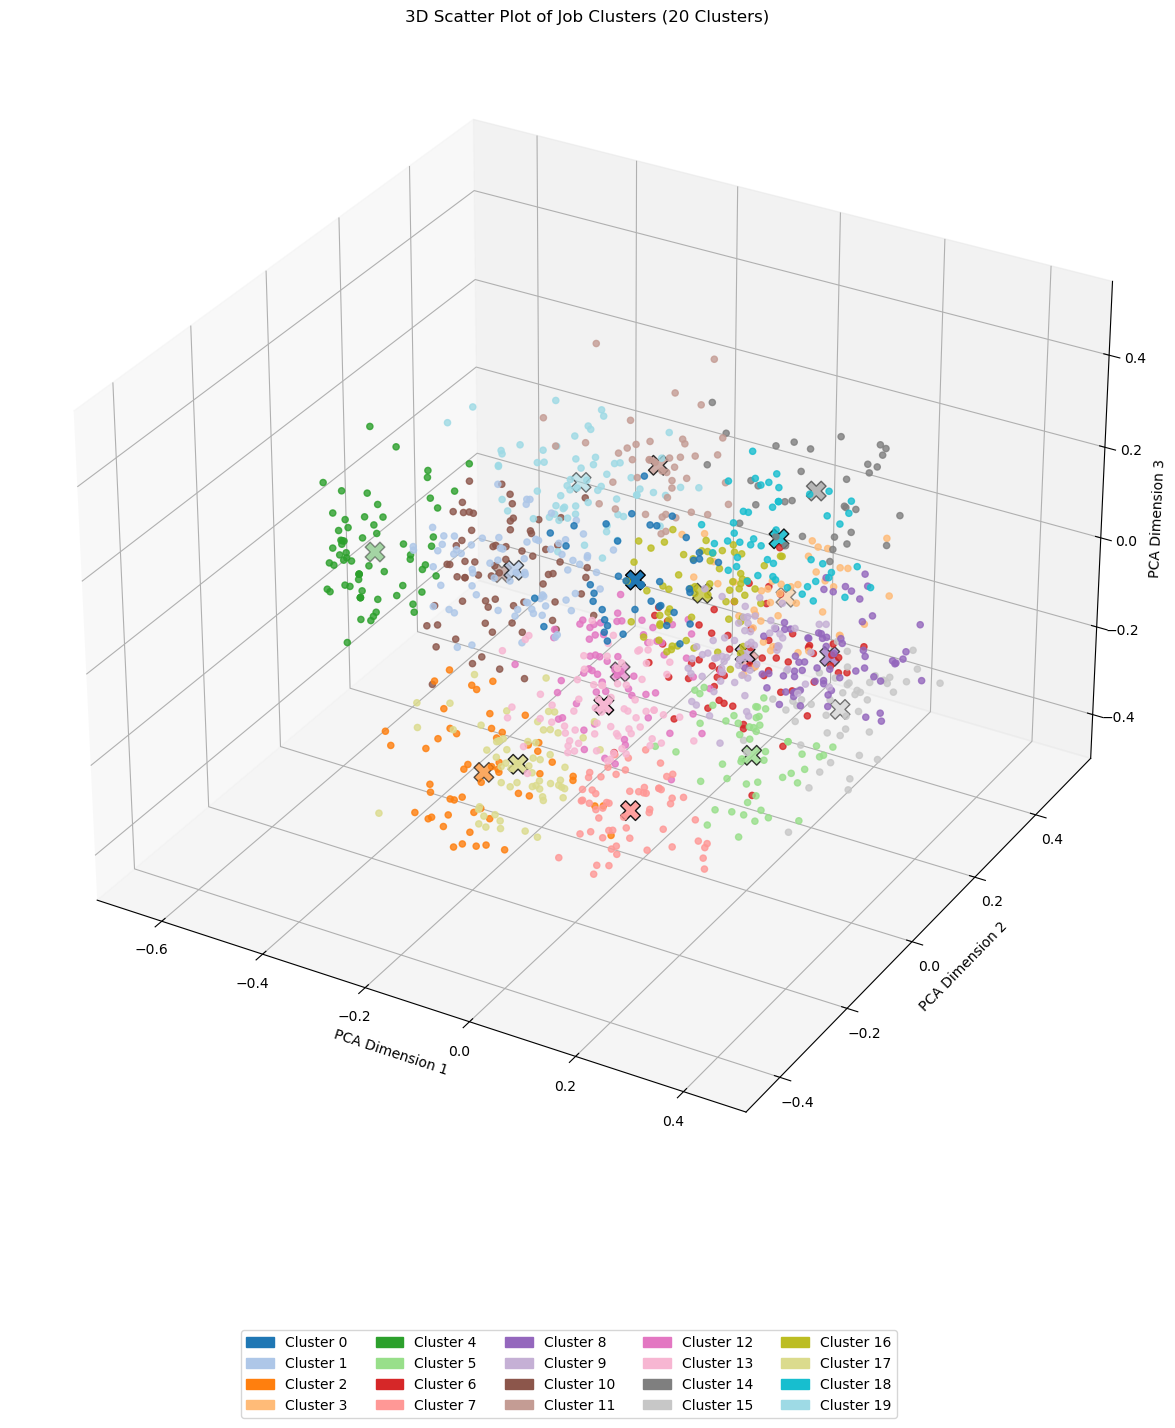

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import matplotlib.patches as mpatches

# Ensure pivot_table is available and contains occupation data
occupations = pivot_table.index.dropna().unique().tolist()

# Load the Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Convert occupation names into numerical vector representations (embeddings)
occupation_embeddings = model.encode(occupations, convert_to_tensor=True).cpu().numpy()

# Reduce dimensions to 3D using PCA
pca = PCA(n_components=3)
occupation_embeddings_3D = pca.fit_transform(occupation_embeddings)

# Set number of clusters to 20 explicitly
optimal_K = 20

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_K, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(occupation_embeddings_3D)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a 3D scatter plot with colored points based on clusters
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for job positions as points colored by their cluster
scatter = ax.scatter(
    occupation_embeddings_3D[:, 0], occupation_embeddings_3D[:, 1], occupation_embeddings_3D[:, 2],
    c=cluster_labels, cmap='tab20', alpha=0.8, s=20
)

# Scatter plot for cluster centers with larger markers and distinct colors
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2],
           c=range(optimal_K), cmap='tab20', marker='X', s=200, edgecolors='black')

# Add labels and title
ax.set_xlabel("PCA Dimension 1")
ax.set_ylabel("PCA Dimension 2")
ax.set_zlabel("PCA Dimension 3")
ax.set_title("3D Scatter Plot of Job Clusters (20 Clusters)")

# Create a legend manually and place it at the bottom
legend_patches = [mpatches.Patch(color=plt.cm.tab20(i / optimal_K), label=f'Cluster {i}') for i in range(optimal_K)]
fig.legend(handles=legend_patches, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=5)

plt.show()


In the 3D Scatter Plot we generated, the X, Y, and Z axes represent the three new dimensions derived through **Principal Component Analysis (PCA)**. These axes do not have a direct real-world meaning but are artificially selected to capture the maximum variance from the original data, which consists of the **embedding vectors of job titles**.  

The axes serve as principal directions in the data, illustrating where groups of similar professions are located in relation to one another. The closer two professions appear in the graph, the more similar they are in their embeddings. Conversely, a profession that appears distant from others is likely to be relatively unique compared to the rest. This visualization helps distinguish between professions based on their underlying semantic similarities within the embedding space.

We will now review our newly created table and identify which occupations have data available from 1995 to 2023. After filtering for these occupations, we will save the results in a new table. This table may provide additional insights, as it will contain only the occupations with consistent data over this period. By focusing on this subset of data, we can potentially uncover new patterns or trends that may be of interest for further analysis.

In [148]:
full_data_occupations = pivot_table.dropna().shape[0]
print(f"Number of occupations with complete data: {full_data_occupations}","\n")

complete_data_pivot = pivot_table.dropna()
complete_data_pivot.head()

#complete_data_pivot.to_csv("complete_data.csv")

Number of occupations with complete data: 36 



Year,1995,1996,1997,1998,1999,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Occupation,,,,,,,,,,,,,,,,,,,,,
Accountants and auditors,1526.0,1538.0,1625.0,1616.0,1658.0,1702.0,1639.0,1723.0,1683.0,1779.0,...,1724.0,1732.0,1777.0,1804.0,1929.0,1964.0,1696.0,1630.0,1652.0,1624.0
Aerospace engineers,78.0,80.0,87.0,86.0,79.0,90.0,82.0,113.0,90.0,110.0,...,147.0,138.0,130.0,148.0,147.0,134.0,129.0,129.0,173.0,166.0
Bakers,129.0,148.0,150.0,152.0,146.0,148.0,183.0,188.0,183.0,186.0,...,224.0,231.0,224.0,215.0,219.0,228.0,235.0,229.0,230.0,233.0
Bartenders,287.0,314.0,310.0,324.0,316.0,341.0,349.0,360.0,384.0,389.0,...,416.0,451.0,454.0,417.0,474.0,464.0,301.0,362.0,457.0,408.0
Bill and account collectors,151.0,166.0,172.0,195.0,175.0,212.0,225.0,229.0,207.0,213.0,...,165.0,168.0,152.0,139.0,122.0,116.0,98.0,97.0,103.0,87.0


In [149]:
complete_data_pivot.shape

(36, 27)

It can be observed that the table contains data for 36 occupations with complete information from 1995 to 2023.

## EDA
In this analysis, we visualize the employment trends for different job positions over time. The data is cleaned and transformed to ensure it is in a suitable format for analysis. We then plot a line for each job position, showing how the number of employees in that position changes year by year. The graph is designed to clearly highlight the shifts in employment across multiple positions, with a legend placed below the plot to ensure clarity. This approach helps in understanding long-term employment trends and identifying patterns or anomalies in job market changes.

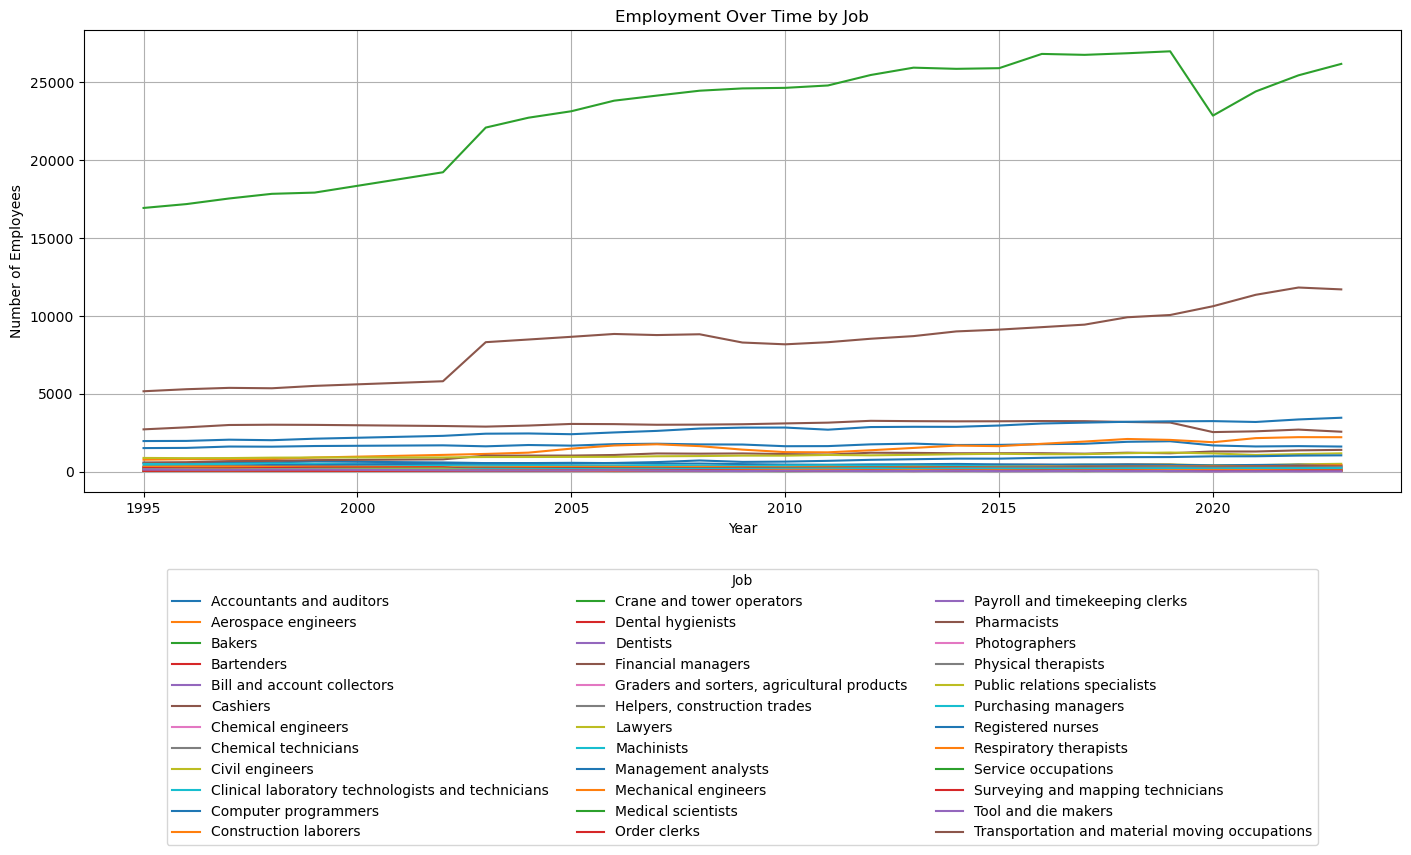

In [150]:
import matplotlib.pyplot as plt

# Clean the data by removing commas and converting to numeric values
pd.set_option('future.no_silent_downcasting', True)
complete_data_pivot = complete_data_pivot.replace({',': ''}, regex=True)  # Remove commas
complete_data_pivot = complete_data_pivot.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, NaN for invalid entries

# Create a line graph for all jobs
plt.figure(figsize=(17, 6))  # Set the size of the plot (width, height)

# Loop through each job and plot a line with a different color
for job in complete_data_pivot.index:
    plt.plot(complete_data_pivot.columns, complete_data_pivot.loc[job], label=job)  # Plot each job's data over the years

# Add a title and labels for the axes
plt.title('Employment Over Time by Job')  # Title of the graph
plt.xlabel('Year')  # Label for the x-axis (years)
plt.ylabel('Number of Employees')  # Label for the y-axis (number of employees)

# Add a legend to explain the colors corresponding to each job, and place it below the graph
plt.legend(title='Job', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)  # Place legend below the plot

# Display the grid for better readability
plt.grid(True)

# Show the plot
plt.show()


We will analyze which professions, for which we have complete data, have experienced the most significant growth and decline over the years.

In [151]:
import pandas as pd
complete_data_pivot.columns = complete_data_pivot.columns.astype(int)

# Calculate the change in employment from 1995 to 2023 for each job
employment_change = complete_data_pivot[2023] - complete_data_pivot[1995]

# Get the top 3 jobs with the largest increase
top_3_increase = employment_change.nlargest(3)

# Get the top 3 jobs with the largest decrease
top_3_decrease = employment_change.nsmallest(3)

# Print the results
print("Top 3 Jobs with the Largest Increase from 1995 to 2023:\n")
for job in top_3_increase.index:
    print(f"{job}: Increase = {top_3_increase[job]}\n 1995: {complete_data_pivot.loc[job, 1995]}, 2023: {complete_data_pivot.loc[job, 2023]}")

print("\nTop 3 Jobs with the Largest Decrease from 1995 to 2023:\n")
for job in top_3_decrease.index:
    print(f"{job}: Decrease = {top_3_decrease[job]}\n 1995: {complete_data_pivot.loc[job, 1995]}, 2023: {complete_data_pivot.loc[job, 2023]}")

Top 3 Jobs with the Largest Increase from 1995 to 2023:

Service occupations: Increase = 9241.0
 1995: 16930.0, 2023: 26171.0
Transportation and material moving occupations: Increase = 6535.0
 1995: 5171.0, 2023: 11706.0
Registered nurses: Increase = 1495.0
 1995: 1977.0, 2023: 3472.0

Top 3 Jobs with the Largest Decrease from 1995 to 2023:

Machinists: Decrease = -202.0
 1995: 509.0, 2023: 307.0
Cashiers: Decrease = -151.0
 1995: 2727.0, 2023: 2576.0
Computer programmers: Decrease = -151.0
 1995: 553.0, 2023: 402.0
